In [1]:
# import csv
import os
import numpy as np
import pandas as pd
x_axis = [0.00,0.05,0.10,0.15,0.20,0.25,
              0.30,0.35,0.40,0.45,0.50,0.55,
              0.60,0.65,0.70,0.75,0.80,0.85,
              0.90,0.95,1.00]
x0 = 0.0
x1 = 1.0
y0 = 0.5
y1 = 0.7
Path = "./results/PTC_MR/WKS/"
# Get list of all files in a given directory sorted by name
list_of_files = sorted( filter( lambda x: os.path.isfile(os.path.join(Path, x)),
                        os.listdir(Path) ) )
result_files = [pd.read_csv(Path+i) for i in list_of_files]

In [2]:
means = np.array([np.mean(file["accuracy"]) for file in result_files])
stds = np.array([np.std(file["accuracy"]) for file in result_files])
stes = np.array([np.std(file["accuracy"]) for file in result_files])/np.sqrt(10)

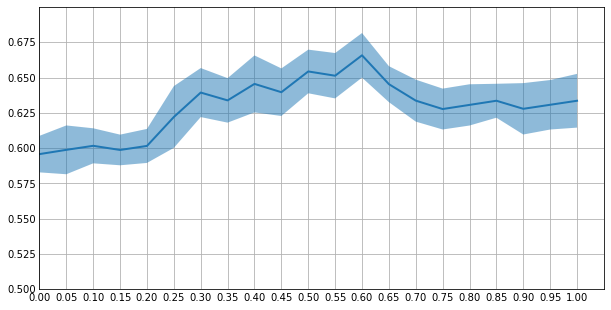

In [8]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')
# plot
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
ax.fill_between(x_axis, means-stes, means+stes, alpha=.5, linewidth=0)
ax.plot(x_axis, means, linewidth=2)
ax.set(xlim=(x0, x1), xticks=np.arange(x0, x1+0.05, 0.05),
       ylim=(y0, y1), yticks=np.arange(y0, y1, 0.025))
plt.show()
